# **Exploring Mental Health - Beginner's Guide**

## [1] Introduction

Mental health plays a crucial role in people’s well-being, yet the factors that lead to depression are complex. In this competition, our goal is to explore data from a mental health survey to find patterns or factors that might contribute to depression.

The dataset includes responses on various demographic and psychological factors. By analyzing these, we aim to build a model that can help identify trends linked to depression, potentially supporting early detection and intervention efforts.

![Alt Text](/kaggle/input/images/mental-health.webp)


## [2] What we have to do?
1. **Exploratory Data Analysis (EDA)**: 
   - Understanding the data, visualizing relationships, and uncovering patterns. Investigating features distribution and visualize relationships. 
 ##
3. **Modeling**:
   - Apply machine learning techniques to build predictive models.

## [3] Data Overview

| Column                             | Description                                                                                   |
|------------------------------------|-----------------------------------------------------------------------------------------------|
| `id`                               | Unique identifier for each survey response.                                                   |
| `Name`                             | Respondent's name.                                                               |
| `Gender`                           | Gender of the respondent.                                         |
| `Age`                              | Age of the respondent in years.                                                               |
| `City`                             | City where the respondent lives.                                                              |
| `Working Professional or Student`  | Whether the respondent is a working professional or a student.                                |
| `Profession`                       | Profession or field of work for working professionals.                                        |
| `Academic Pressure`                | Level of academic stress experienced.                               |
| `Work Pressure`                    | Level of work-related stress experienced.                           |
| `CGPA`                             | Cumulative Grade Point Average for students.                                                  |
| `Study Satisfaction`               | Respondent’s satisfaction with their studies.                       |
| `Job Satisfaction`                 | Respondent’s satisfaction with their job.                           |
| `Sleep Duration`                   | Average hours of sleep per night.                                                             |
| `Dietary Habits`                   | Information about eating habits.                                 |
| `Degree`                           | Highest degree or level of education achieved.                                                |
| `Have you ever had suicidal thoughts?` | Whether the respondent has experienced suicidal thoughts.                    |
| `Work/Study Hours`                 | Average hours spent working or studying per day.                                              |
| `Financial Stress`                 | Level of financial stress experienced.                              |
| `Family History of Mental Illness` | Whether there is a family history of mental health issues.                           |
| `Depression`                       | Whether the respondent shows signs of depression (target variable).                           |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')

In [3]:
train_data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
print(f"The training dataset contains {train_data.shape[0]} examples (rows) and {train_data.shape[1]} features (columns).")

The training dataset contains 140700 examples (rows) and 20 features (columns).


In [5]:
train_data.Name.nunique()

422

- We observe that the *Name* attribute is not unique across all rows, which suggests it might represent family names or shared identifiers rather than unique individual names.

In [6]:
train_data.Gender.value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
train_data['Age'] = train_data['Age'].astype('int64')

We can see that the dataset contains missing values in several columns. We'll review each column individually to determine the best approach for handling these missing values, ensuring we maintain data integrity and maximize the usefulness of our dataset for analysis.

## [4] Missing Values

- We will start with `Profession` column

In [9]:
train_data['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [10]:
train_data['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

#### Unique Values in the `Profession` Column

The unique values in the `Profession` column contain a mixture of valid job titles, academic degrees, and other inconsistent or non-professional entries.

#### 1. **Job Titles:**
These entries refer to actual occupations or roles individuals may have:
- `Chef`, `Teacher`, `Business Analyst`, `Software Engineer`, `Data Scientist`, `Marketing Manager`, `Accountant`, `Pharmacist`, `Architect`, `Doctor`, `Investment Banker`, `HR Manager`, `Graphic Designer`, `Sales Executive`, etc.

#### 2. **Academic Degrees or Educational Backgrounds:**
These entries refer to educational qualifications rather than current professions:
- `B.Com` – Bachelor of Commerce
- `MBA` – Master of Business Administration
- `LLM` – Master of Laws
- `BCA` – Bachelor of Computer Applications
- `BBA` – Bachelor of Business Administration
- `MBBS` – Bachelor of Medicine, Bachelor of Surgery
- `PhD` – Doctor of Philosophy
- `B.Ed` – Bachelor of Education
- `M.Ed` – Master of Education
- `BE` – Bachelor of Engineering

#### 3. **Potential Errors or Inconsistent Data:**
Some entries appear to be incorrect or irrelevant in a `Profession` column:
- `Yogesh`, `Dev`, `Pranav`, `Yuvraj` – Likely names, not professions.
- `Patna`, `Visakhapatnam`, `Nagpur` – City names, which don’t fit the context of profession.
- `FamilyVirar`, `City Manager`, `Unveil` – These do not correspond to standard professions and may be data entry errors.

#### 4. **Descriptors:**
These entries describe employment status or professional activity levels rather than specific job titles:
- `Student`, `Unemployed`, `Moderate`, `Working Professional` – These suggest employment status or career stage rather than an occupation.


In [11]:
train_data['Profession'].isna().sum()

36630

In [12]:
train_data[train_data['Profession'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140686,140686,Rohan,Male,27,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,140689,Ayaan,Male,31,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,140690,Rashi,Female,18,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1


It is clear that we would expect missing values in the `Profession` column for records related to students, as they may not yet have a profession. However, The table above shows that some missing values in `Profession` are not associated with students. To investigate further, we’ll look at the value counts of the `Working Professional or Student` column where `Profession` is null

In [13]:
missing_profession = train_data[train_data['Profession'].isna()]

In [14]:
missing_profession['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27867
Working Professional     8763
Name: count, dtype: int64

To understand why some `Working Professional` entries have missing `Profession` values, we looked at the `Degree` column for these cases. 

In [15]:
missing_profession[missing_profession['Working Professional or Student'] == 'Working Professional'].Degree.value_counts()

Degree
Class 12    8590
B.Arch        13
B.Ed          11
MD            11
BHM           10
BCA           10
M.Com          8
MBA            8
MCA            8
BE             8
MA             7
LLB            7
BSc            7
B.Com          6
B.Tech         5
B.Pharm        5
MBBS           5
M.Ed           5
M.Pharm        5
MSc            5
ME             4
M.Tech         4
BBA            3
LLM            3
PhD            3
BA             2
MHM            2
LLBA           1
5.56           1
Degree         1
5.88           1
Navya          1
M              1
Name: count, dtype: int64

- **High Frequency of "Class 12":** The majority of missing `Profession` entries are associated with "Class 12" (8,590 records), suggesting many working professionals without a specified profession may not have higher education or formal job titles.

- **Wide Range of Degrees:** Other degrees, like B.Arch, B.Ed, MBA, and MBBS, appear in lower numbers. This diversity indicates individuals from various educational backgrounds but with undefined professions in the dataset.

- **Unusual Entries:** Some values, like "5.56" and "Navya," don't match typical degrees, suggesting data entry errors or anomalies that may need cleaning.

- **Potential Imputation Approach:** For "Class 12" entries, it may be best to leave `Profession` missing or assign a general title. For higher degrees, missing values could be filled with generic roles based on the degree (e.g., "Engineer" for B.Tech).

These insights help us decide how to address missing `Profession` values among working professionals.

In [16]:

degree_to_profession = {
    'B.Tech': 'IT',
    'BE': 'Engineer',
    'MBA': 'Business Analyst',
    'MPA': 'Government Official',
    'BBA': 'Business Assistant',
    'MBBS': 'Doctor',
    'B.Com': 'Accountant',
    'B.Arch': 'Architect',
    'BArch': 'Architect',
    'BPA': 'Artist',
    'BH': 'Artist',
    'B.B.Arch': 'Architect',
    'M.Arch' : 'Architect',
    'BCA': 'IT',
    'E.Tech' : 'IT',
    'S.Tech' : 'IT',
    'MCA': 'IT',
    'LLB': 'Lawyer',
    'PhD': 'Researcher',
    'Class 12': 'Unspecified',
    'Class 11': 'Unspecified',
    'CGPA' : 'Unspecified',
    'M.Ed': 'Teacher',
    'B.Ed': 'Teacher',
    'A.Ed': 'Teacher',
    'L.Ed' : 'Teacher',
    'LLEd' : 'Teacher',
    'LL B.Ed' : 'Teacher',
    'MD': 'Doctor',
    'M.Com': 'Economist',
    'P.Com': 'Economist', 
    'BHM': 'Hospitality Manager',
    'MA': 'Educator',
    'BSc': 'Scientist',
    'B.Sc': 'Scientist',
    'B.Pharm': 'Pharmacist',
    'BPharm': 'Pharmacist',
    'M.Pharm': 'Pharmacist',
    'MPharm' : 'Pharmacist',
    'S.Pharm' : 	'Pharmacist',
    'M.Tech': 'Engineer',
    'MSc': 'Scientist',
    'ME': 'Engineer',
    'BA': 'Educator',
    'MHM': 'Hospitality Manager',
    'LLM': 'Lawyer',
    'LLBA': 'Lawyer',
    'BCA': 'IT Specialist',
    'Brit' : 'Radiology Technician',
    'LHM': 'Humanitarian',
}

# Step 2: Apply the mappings to fill missing values in Profession
train_data['Profession'] = train_data.apply(
    lambda row: degree_to_profession.get(row['Degree'], row['Profession']),
    axis=1
)

train_data.fillna({'Profession': 'Unknown'}, inplace = True)

In [17]:
train_data['Profession'].unique()

array(['Hospitality Manager', 'Lawyer', 'Pharmacist',
       'Business Assistant', 'IT', 'Doctor', 'Scientist', 'Engineer',
       'Architect', 'IT Specialist', 'Educator', 'Teacher', 'Accountant',
       'Business Analyst', 'Economist', 'Unspecified', 'Researcher',
       'HR Manager', 'Government Official', 'Artist', 'Content Writer',
       'Chemist', 'Unknown', 'Consultant', 'Civil Engineer',
       'Educational Consultant', 'Manager', 'Plumber',
       'Radiology Technician', 'Customer Support', 'Sales Executive',
       'Graphic Designer', 'Pilot', 'Financial Analyst', 'UX/UI Designer',
       'Entrepreneur', 'Humanitarian', 'Digital Marketer'], dtype=object)

In [18]:
train_data['Profession'].value_counts()

Profession
Teacher                   17373
Unspecified               14731
Engineer                  11211
Pharmacist                10398
Scientist                  9909
IT                         9661
Lawyer                     8998
Architect                  8750
Accountant                 8113
Hospitality Manager        7591
Educator                   6637
Doctor                     6467
IT Specialist              5739
Business Assistant         5030
Business Analyst           3822
Researcher                 3106
Economist                  3096
Unknown                      26
Consultant                    5
Plumber                       5
Educational Consultant        4
HR Manager                    4
Content Writer                4
UX/UI Designer                3
Graphic Designer              2
Artist                        2
Chemist                       2
Manager                       1
Civil Engineer                1
Radiology Technician          1
Customer Support             

We can group professions into relevant categories based on their nature or industry:

In [19]:
def categorize_profession(profession):
    categories = {
        'Education': ['Teacher', 'Educator', 'Educational Consultant'],
        'Engineering': ['Engineer', 'Civil Engineer', 'IT Specialist', 'Radiology Technician'],
        'Healthcare': ['Pharmacist', 'Doctor', 'Medical Doctor'],
        'IT': ['IT Specialist', 'Software Developer', 'UX/UI Designer', 'Graphic Designer'],
        'Legal': ['Lawyer', 'Judge'],
        'Architecture': ['Architect'],
        'Finance': ['Accountant', 'Financial Analyst', 'Economist'],
        'Business': ['Business Assistant', 'Business Analyst', 'Manager', 'Entrepreneur', 'Consultant', 'HR Manager'],
        'Hospitality': ['Hospitality Manager'],
        'Science': ['Scientist', 'Researcher', 'Chemist'],
        'Arts': ['Content Writer', 'Artist', 'Digital Marketer'],
        'Trades': ['Plumber'],
        'Public Service': ['Government Official', 'Humanitarian'],
        'Customer Service': ['Customer Support', 'Sales Executive'],
        'Aviation': ['Pilot'],
        'Unspecified': ['Unspecified'],
        'Unknown': ['Unknown']
    }
    
    for category, professions in categories.items():
        if profession in professions:
            return category
    return 'Other'

train_data['Profession Category'] = train_data['Profession'].apply(categorize_profession)

In [20]:
train_data['Profession Category'].value_counts()

Profession Category
Education           24014
Engineering         16952
Healthcare          16865
Unspecified         14731
Science             13017
Finance             11210
Other                9661
Legal                8998
Business             8863
Architecture         8750
Hospitality          7591
Unknown                26
Arts                    7
Trades                  5
IT                      5
Public Service          2
Customer Service        2
Aviation                1
Name: count, dtype: int64

- Let's take a look at the `Academic Pressure` column

In [21]:
train_data['Academic Pressure'].value_counts()

Academic Pressure
3.0    7463
5.0    6296
4.0    5158
1.0    4801
2.0    4179
Name: count, dtype: int64

In [22]:
train_data['Academic Pressure'].isna().sum()

112803

In [23]:
train_data['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

We observe that the number of missing values in the `Academic Pressure` column closely matches the missing values in the following columns:

`CGPA`
<br>
`Study Satisfaction`
<br>
<br>

When we look at the `Working Professional or Student` column, we find 112,799 entries for **Working Professional** and 27,901 entries for **Student**.

This suggests that the missing values in Academic Pressure likely correspond to individuals who were not students at the time the dataset was collected, as academic pressure would be irrelevant to them. Therefore, the null values in this column likely indicate respondents who were working professionals rather than students.


**Handling Missing Values in the Academic Pressure Column**
<br>
<br>

In [24]:
train_data[train_data['Academic Pressure'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession Category
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Hospitality Manager,NaN,5.0,NaN,...,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,Hospitality
1,1,Vivan,Male,26,Varanasi,Working Professional,Lawyer,NaN,4.0,NaN,...,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,Legal
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Business Assistant,NaN,5.0,NaN,...,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,Business
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Assistant,NaN,1.0,NaN,...,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,Business
5,5,Vani,Female,59,Ahmedabad,Working Professional,IT,NaN,2.0,NaN,...,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Ishaani,Female,45,Ahmedabad,Working Professional,Teacher,NaN,2.0,NaN,...,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0,Education
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,Unspecified,NaN,5.0,NaN,...,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,Unspecified
140696,140696,Lata,Female,41,Hyderabad,Working Professional,IT,NaN,5.0,NaN,...,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,Other
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Accountant,NaN,3.0,NaN,...,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,Finance


- Conclusion:
<br>
<br>
There are huge amount of missing values in the `Academic Pressure`, `CGPA`, and `Study Satisfaction` columns. Filling these missing values is a challenge, as using simple strategies like the median may introduce bias.
<br>
<br>
For example, if we fill missing values in `Academic Pressure` (measured on a scale from 1 to 5) with the most frequent value, it could skew this feature toward a particular value, reducing the natural variability in responses. To address this, more advanced methods may be needed, or we may need to evaluate whether to exclude this feature in certain analyses to avoid potential bias.

<br>


**Handling Missing Values in the Work Pressure Column**

In [25]:
train_data['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

In [26]:
train_data['Work Pressure'].isna().sum()

27918

We notice that the missing values in the `Work Pressure` and `Job Satisfaction` columns likely correspond to students who do not have jobs and, therefore, have no work pressure to report.
<br>
<br>
So we will fill these missing values with `0`

In [27]:
train_data.fillna({'Work Pressure' : 0}, inplace=True)
train_data.fillna({'Job Satisfaction': 0}, inplace=True)

<br>

**Cleaning the `Dietary Habits` Column**

when reviewing the `Dietary Habits` column, it was observed that:

- Some individuals mistakenly entered **degree values** (e.g., `BSc`, `M.Tech`) into this column instead of dietary habits.
- There are **numerical entries** (e.g., `1.0`, `3`, `2`) which may reflect attempts to measure dietary habits on a numerical scale.
- Certain entries (e.g., `Male`, `Gender`, `Indoor`) are unrelated and were likely misentered.

To address these issues:
1. **Unification**: Obvious entries related to dietary habits (e.g., `More Healthy`, `Less Healthy`) were mapped into one of the three main categories: `Healthy`, `Moderate`, or `Unhealthy`.
2. **Dropping Invalid Entries**: Ambiguous or unrelated values (e.g., `BSc`, `Mihir`) were standardized or dropped based on their context.
<br>
<br>

In [28]:
train_data['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [29]:
def clean_dietary_habits(dataframe, drop=True):
    # Unify the column values
    dietary_habits_mapping = {
        'Moderate': 'Moderate',
        'Healthy': 'Healthy',
        'Unhealthy': 'Unhealthy',
        'More Healthy': 'Healthy',
        'Less Healthy': 'Unhealthy',
        'Less than Healthy': 'Unhealthy',
        'No Healthy': 'Unhealthy'
    }
    
    dataframe['Dietary Habits'] = dataframe['Dietary Habits'].replace(dietary_habits_mapping)
    
    # List of invalid values to handle
    invalid_values = [
        'Yes', 'No', 'Class 12', 'Indoor', 'Male', 'Vegas', 
        'M.Tech', '1.0', 'Electrician', 'Hormonal', 'Mihir', 
        'Pratham', '2', '3', 'Gender', 'BSc'
    ]
    
    if drop:
        # Drop rows containing invalid values
        dataframe = dataframe[~dataframe['Dietary Habits'].isin(invalid_values)]
    else:
        # Replace invalid values with NaN
        dataframe['Dietary Habits'] = dataframe['Dietary Habits'].apply(
            lambda x: x if x not in invalid_values else None
        )
        # Fill NaN values with the most frequent value
    most_frequent = dataframe['Dietary Habits'].mode()[0]
    dataframe['Dietary Habits'] = dataframe['Dietary Habits'].fillna(most_frequent)
    
    return dataframe

In [30]:
train_data = clean_dietary_habits(train_data)

/tmp/ipykernel_17/1478261073.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Dietary Habits'] = dataframe['Dietary Habits'].fillna(most_frequent)


In [31]:
train_data['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49709
Unhealthy    46230
Healthy      44743
Name: count, dtype: int64

In [32]:
train_data['Dietary Habits'].isna().sum()

0

<br>

**Handling Missing Values in the Degree Column**

In [33]:
train_data[train_data['Degree'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession Category
110064,110064,Riya,Female,28,Srinagar,Working Professional,Unknown,NaN,3.0,NaN,...,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1,Unknown
128934,128934,Anaya,Female,28,Srinagar,Working Professional,Unknown,NaN,5.0,NaN,...,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0,Unknown


When analyzing the `Degree` column, we found two missing values. Unfortunately, these rows lack any additional information in related columns. Since we cannot accurately impute these missing values, we will drop these rows to maintain the integrity of the dataset.

In [34]:
train_data = train_data.dropna(subset=['Degree']).reset_index(drop=True)

<br>

**Handling Missing Values in the Financial Stress Column**
<br>
<br>

In [35]:
train_data['Financial Stress'].value_counts()

Financial Stress
2.0    31447
5.0    28274
4.0    27762
1.0    27206
3.0    25987
Name: count, dtype: int64

In [36]:
train_data[train_data['Financial Stress'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession Category
22373,22377,Manvi,Female,32,Varanasi,Student,IT Specialist,3.0,0.0,5.64,...,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1,Engineering
51478,51485,Ishwar,Male,37,Hyderabad,Working Professional,Unspecified,NaN,4.0,NaN,...,2.0,More than 8 hours,Moderate,Class 12,Yes,9.0,NaN,No,0,Unspecified
68901,68910,Arav,Male,29,Hyderabad,Student,Teacher,2.0,0.0,8.94,...,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0,Education
97598,97610,Pari,Female,20,Kolkata,Student,Doctor,1.0,0.0,6.83,...,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0,Healthcare


In [37]:
most_frequent_financial_stress = train_data['Financial Stress'].mode()[0]

train_data.fillna({'Financial Stress' : most_frequent_financial_stress}, inplace = True)

**Conclusion**

After completing the missing values handling step:

- Most missing values were filled using appropriate techniques based on logical reasoning and available information.  
- However, columns such as `CGPA`, `Academic Pressure`, and `Study Satisfaction` contain a significant amount of missing data.  
- Imputing these values might introduce bias and negatively affect data quality and model behavior.  
- To maintain data integrity and improve model performance, these columns will be dropped from the dataset.

In [38]:
train_data.drop(['CGPA', 'Academic Pressure', 'Study Satisfaction'], axis=1, inplace=True)

In [39]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Profession Category                      0
dtype: int64

## [5] EDA

Every dataset contains valuable insights waiting to be discovered. In this section, we begin by exploring the dataset to better understand the characteristics of each feature. We will start with the value counts for categorical variables, along with the distributions of numerical features, to uncover any patterns, trends, or anomalies.

### Focus and Objectives

Our primary goal is to explore the relationships between various features and the target variable: mental health status. By analyzing this data, we aim to identify the factors that most significantly contribute to mental health conditions.

Some key questions we aim to answer include:

- What factors are most influential in determining mental health status?  
- How do age and gender correlate with mental health conditions?  
- Does work-related stress or job type have a significant impact on mental health?  
- Are certain lifestyle factors, such as dietary habits or physical activity, associated with better or worse mental health outcomes?  
- How do academic or professional pressures influence mental health status?  


#### 1) Target Distribution

In [40]:
train_data['Depression'].value_counts()

Depression
0    115120
1     25560
Name: count, dtype: int64

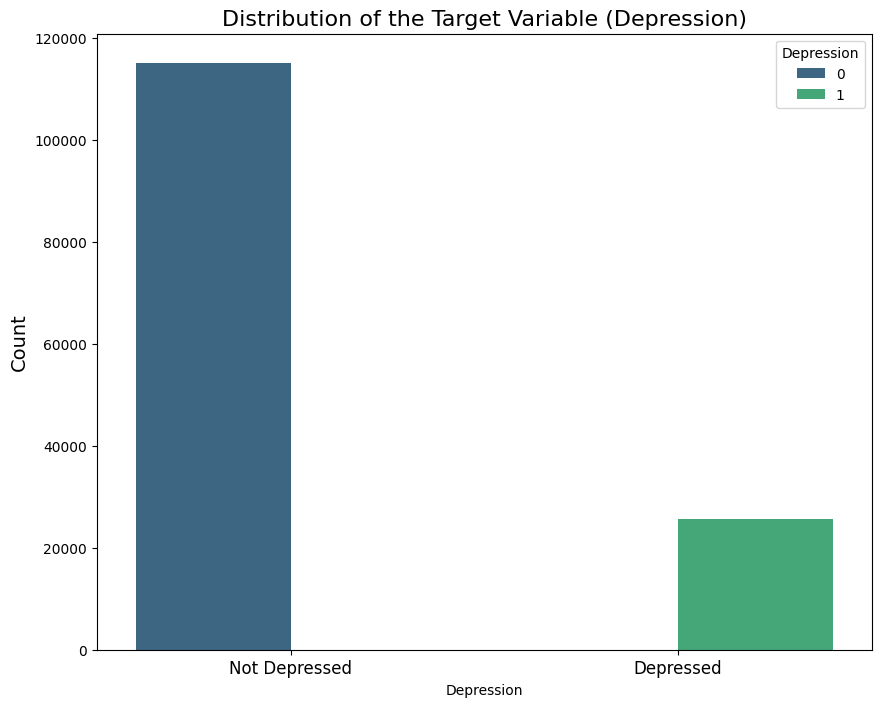

In [41]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Depression', data=train_data, palette='viridis', hue='Depression')

plt.title('Distribution of the Target Variable (Depression)', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Depressed', 'Depressed'], fontsize=12)

plt.show()

The `Depression` column shows a significant imbalance: 115,120 instances of not depressed (0) compared to 25,560 instances of depressed (1). This imbalance could impact the performance of predictive models.

*Note: Balancing the dataset will be crucial for building a reliable model to accurately predict depression.*

#### 2) Personal Features Distributions

- Gender

<function matplotlib.pyplot.show(close=None, block=None)>

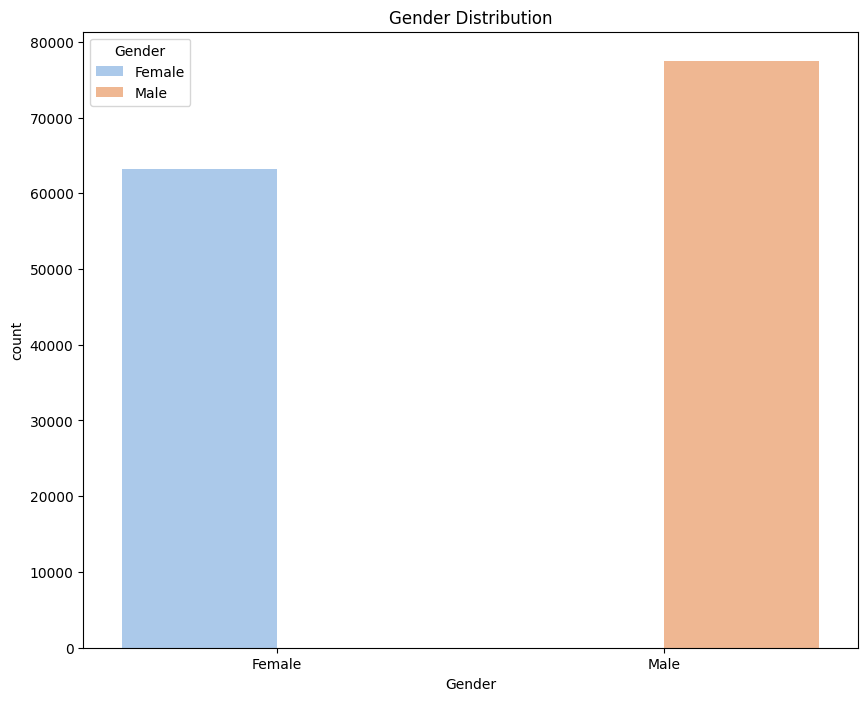

In [42]:
plt.figure(figsize=(10, 8))

sns.countplot(data=train_data, x='Gender', palette='pastel', hue='Gender')
plt.title('Gender Distribution')

plt.show

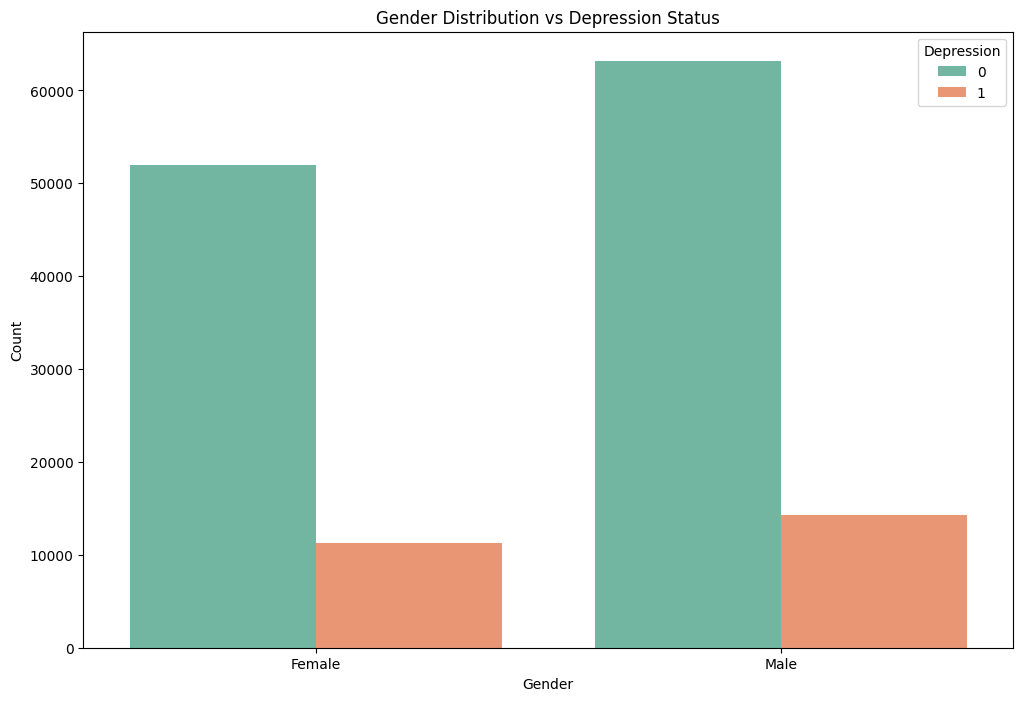

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='Gender', hue='Depression', palette='Set2')

plt.title('Gender Distribution vs Depression Status')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

- Age

In [44]:
print(f'Min age in the dataset :', train_data['Age'].min())
print(f'Max age in the dataset :', train_data['Age'].max())

Min age in the dataset : 18
Max age in the dataset : 60


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


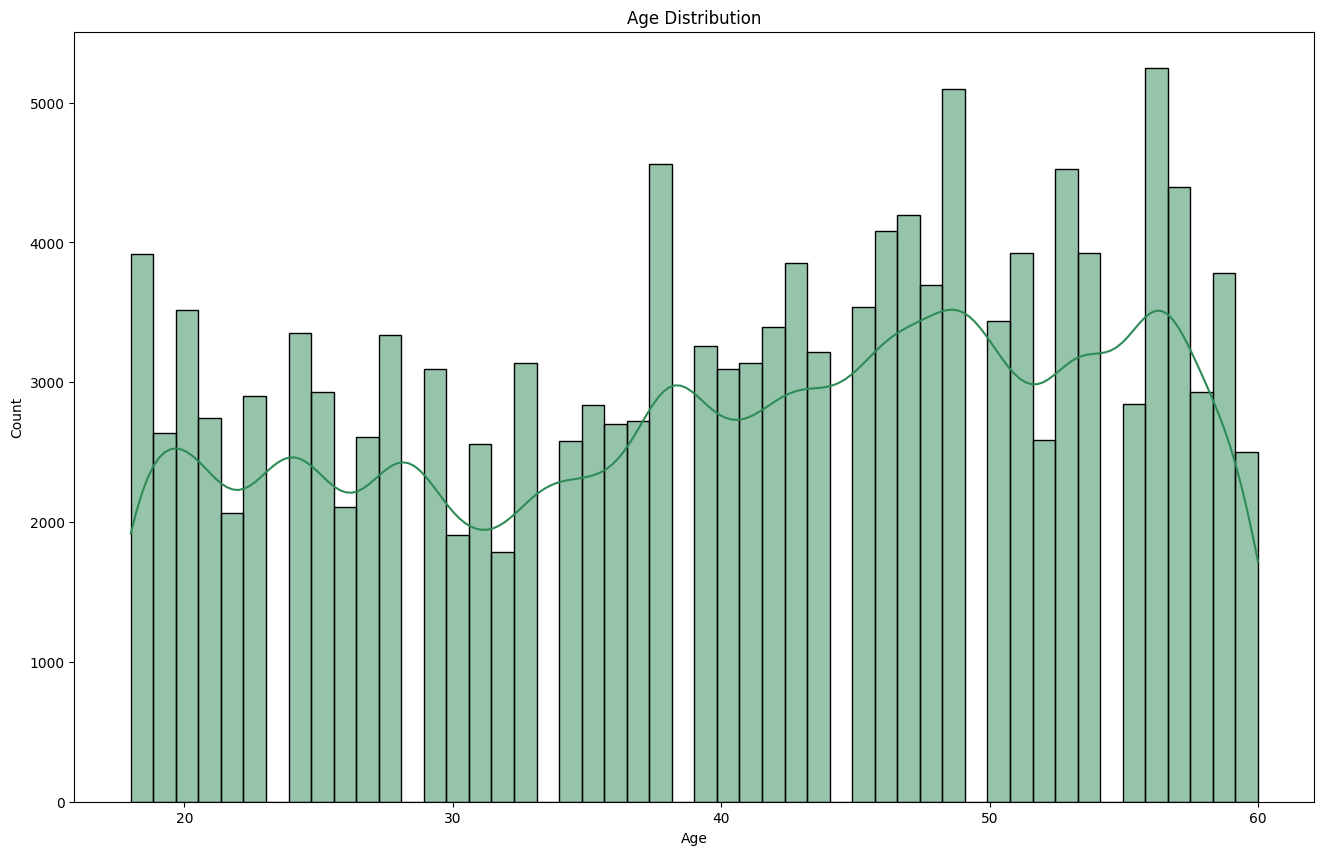

In [45]:
plt.figure(figsize=(16, 10))

sns.histplot(train_data['Age'], bins=50, kde=True, color='seagreen')
plt.title('Age Distribution')

plt.show()

- City

In [46]:
train_data['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [47]:
target_cities = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
    'Nashik', 'Bangalore', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
    'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata', 'Chennai',
    'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi', 'Bhopal', 'Indore'
] # After cleaning

In [48]:
# Calculate the value counts
city_counts = train_data[train_data['City'].isin(target_cities)]['City'].value_counts()

# Reindex to ensure all target cities are included
city_counts = city_counts.reindex(target_cities)

# Create a DataFrame with cities and their counts
city_data = pd.DataFrame({
    'City': target_cities,
    'Depression Count': city_counts.values
})

# Initialize the map
india_map = folium.Map(
    location=[20.5937, 78.9629],
    zoom_start=5,
    scrollWheelZoom=False,
    dragging=False
)

# Coordinates for the cities
city_coords = {
    'Ludhiana': [30.9008, 75.8573],
    'Varanasi': [25.3176, 82.9739],
    'Visakhapatnam': [17.6869, 83.2185],
    'Mumbai': [19.0760, 72.8777],
    'Kanpur': [26.4499, 80.3319],
    'Ahmedabad': [23.0225, 72.5714],
    'Thane': [19.2183, 72.9785],
    'Nashik': [19.9975, 73.7898],
    'Bangalore': [12.9716, 77.5946],
    'Patna': [25.5941, 85.1376],
    'Rajkot': [22.3039, 70.8022],
    'Jaipur': [26.9124, 75.7873],
    'Pune': [18.5204, 73.8567],
    'Lucknow': [26.8467, 80.9462],
    'Meerut': [28.9845, 77.7040],
    'Agra': [27.1767, 78.0081],
    'Surat': [21.1702, 72.8311],
    'Faridabad': [28.4089, 77.3178],
    'Hyderabad': [17.3850, 78.4867],
    'Srinagar': [34.0836, 74.7973],
    'Ghaziabad': [28.6139, 77.2916],
    'Kolkata': [22.5726, 88.3639],
    'Chennai': [13.0827, 80.2707],
    'Kalyan': [19.2416, 73.1349],
    'Nagpur': [21.1458, 79.0882],
    'Vadodara': [22.3072, 73.1812],
    'Vasai-Virar': [19.4390, 72.8197],
    'Delhi': [28.6139, 77.2090],
    'Bhopal': [23.2599, 77.4126],
    'Indore': [22.7196, 75.8577]
}

for i, row in city_data.iterrows():
    city = row['City']
    lat, lon = city_coords.get(city, [None, None])
    if lat and lon:
        popup_text = f"""
        <b>{city}</b><br>
        Depression Cases: {row['Depression Count']}<br>
        """
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(india_map)

india_map

- Dietary Habits

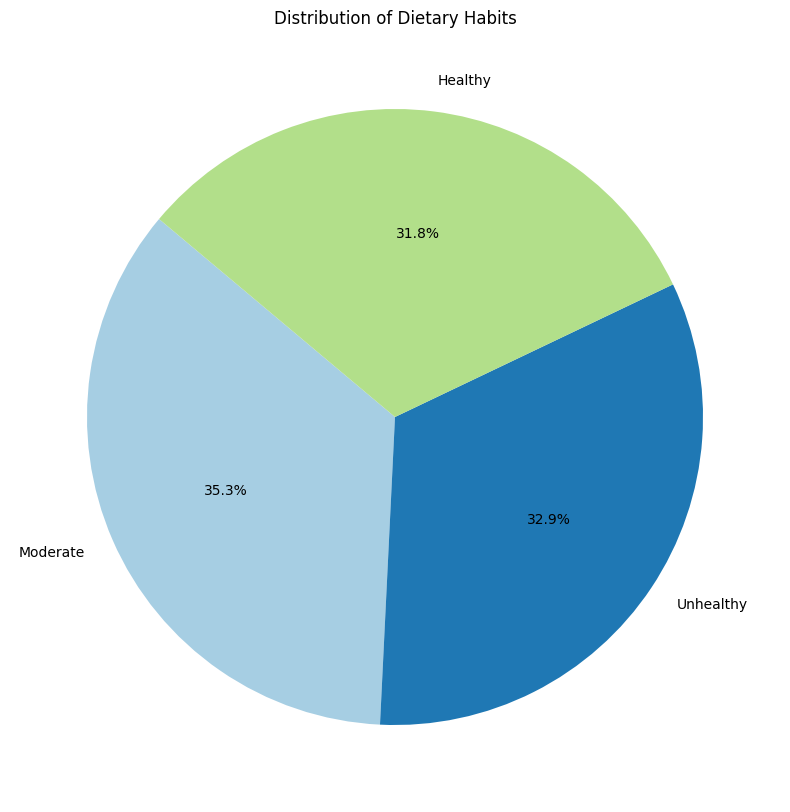

In [49]:
dietary_counts = train_data['Dietary Habits'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(
    dietary_counts, 
    labels=dietary_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title('Distribution of Dietary Habits')
plt.show()

- Suicidal Thoughts Distribution

In [50]:
train_data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71132
Yes    69548
Name: count, dtype: int64

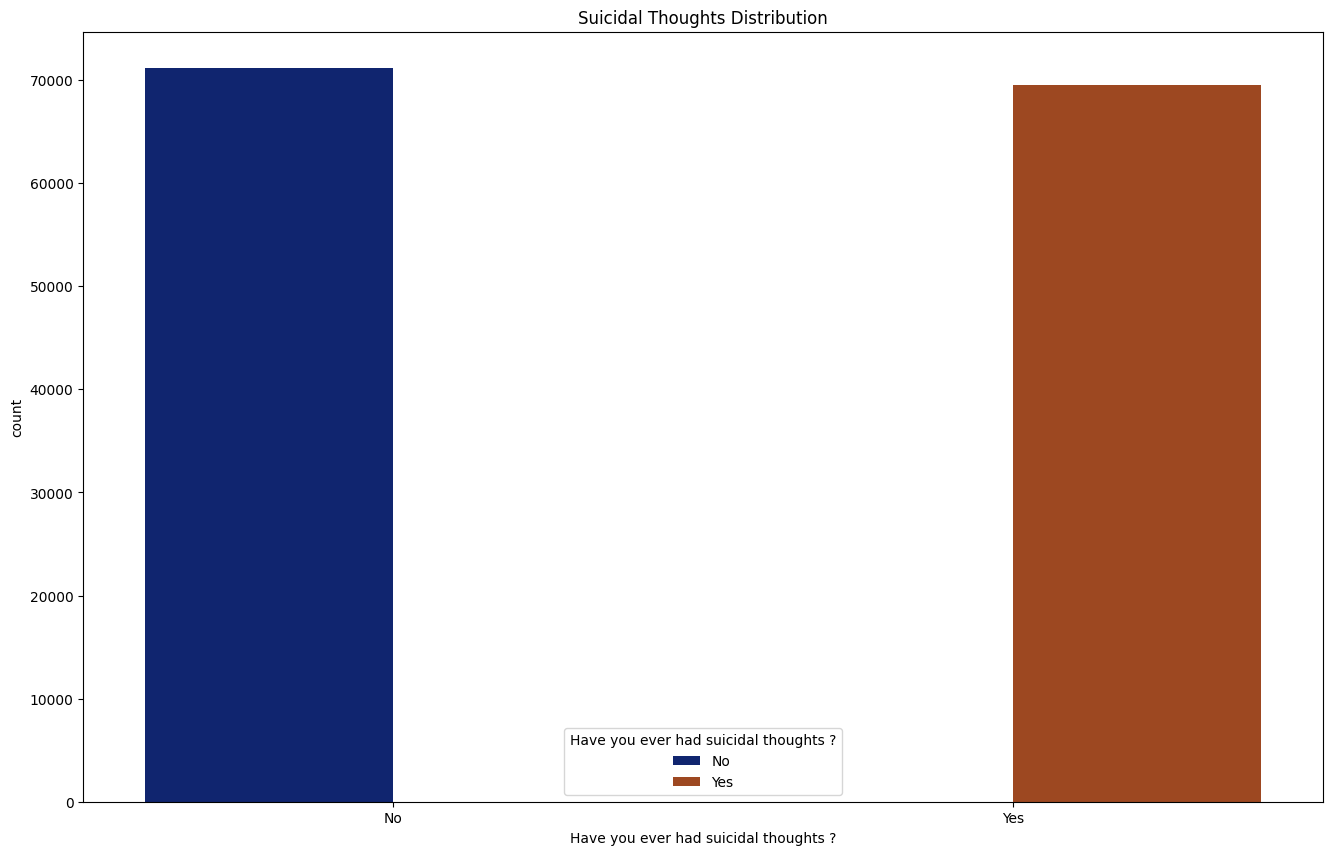

In [51]:
plt.figure(figsize=(16, 10))

sns.countplot(data=train_data, x='Have you ever had suicidal thoughts ?', palette='dark', hue='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Distribution')

plt.show()

- Financial Stress Distribution

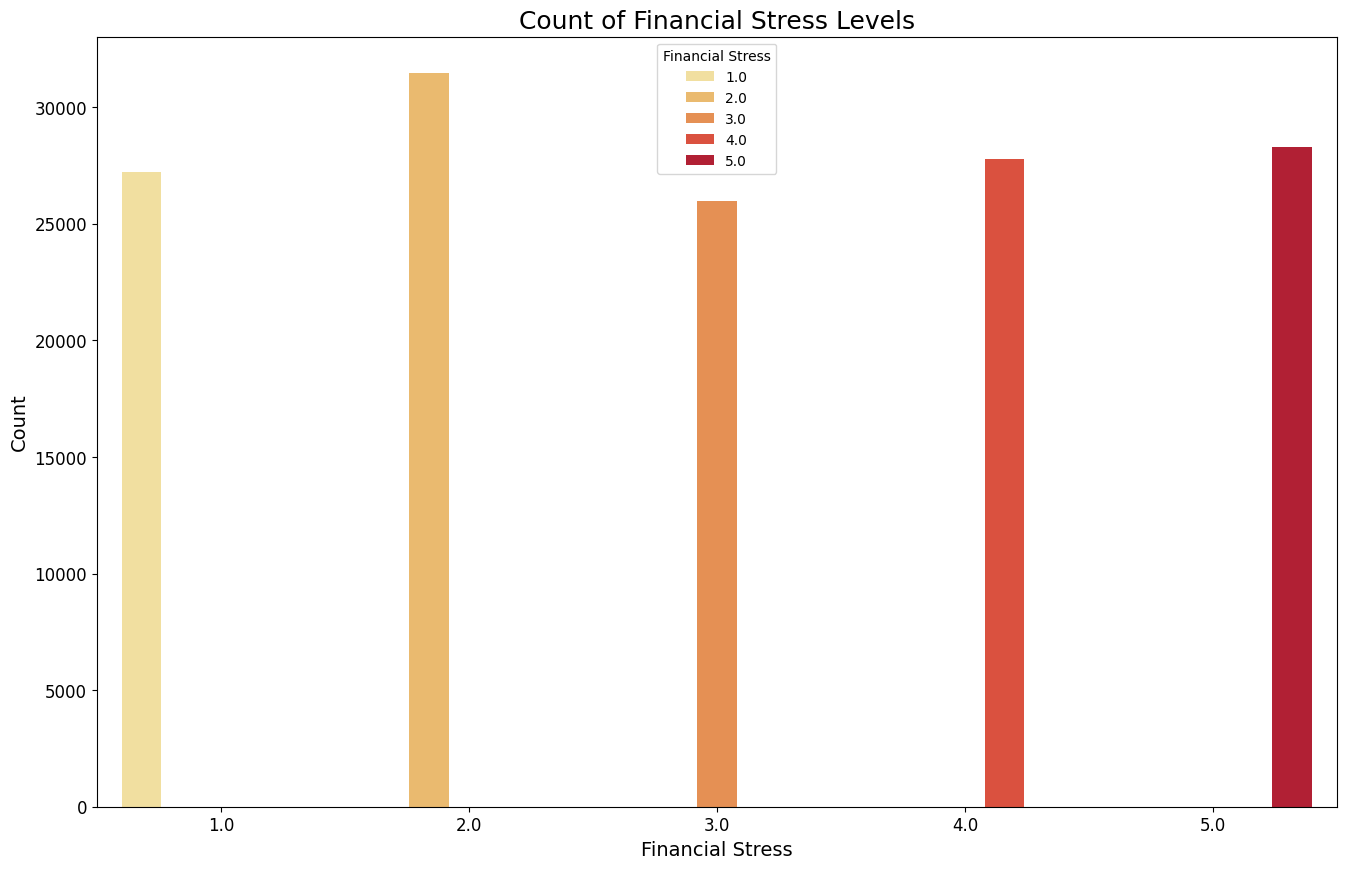

In [52]:
plt.figure(figsize=(16, 10))
sns.countplot(data=train_data, x='Financial Stress', hue= 'Financial Stress', palette='YlOrRd')
plt.title('Count of Financial Stress Levels', fontsize=18)
plt.xlabel('Financial Stress', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### 3)  Work and Study Analysis

- Working Professional or Student

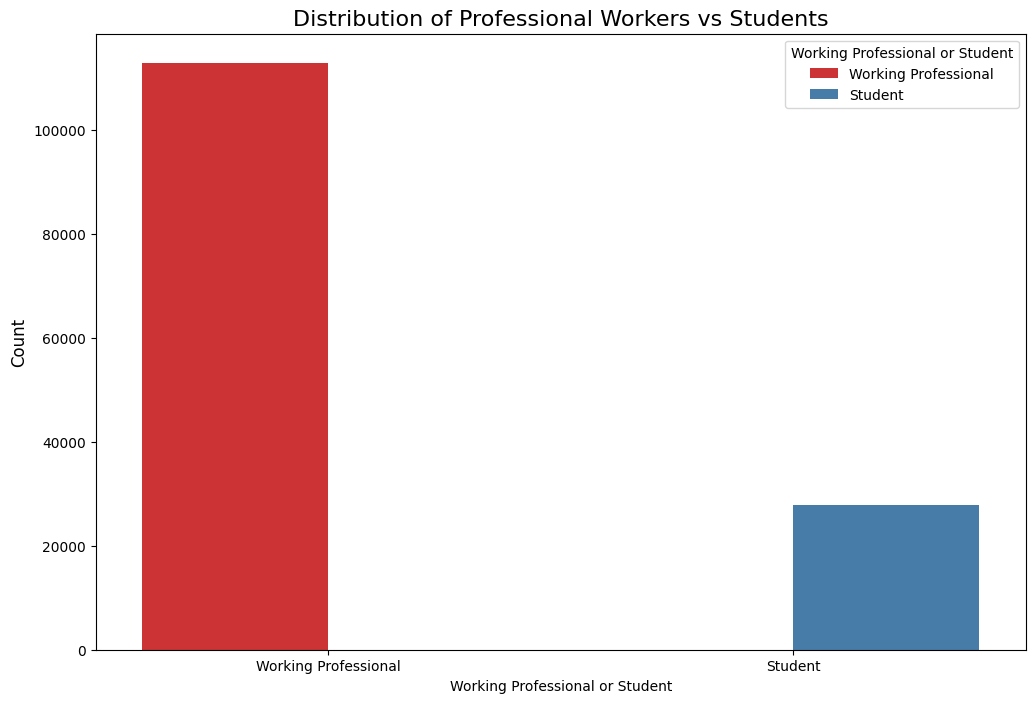

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='Working Professional or Student', hue='Working Professional or Student', palette='Set1')
plt.title('Distribution of Professional Workers vs Students', fontsize=16)
plt.ylabel('Count', fontsize=12)


plt.show()

- Work Pressure

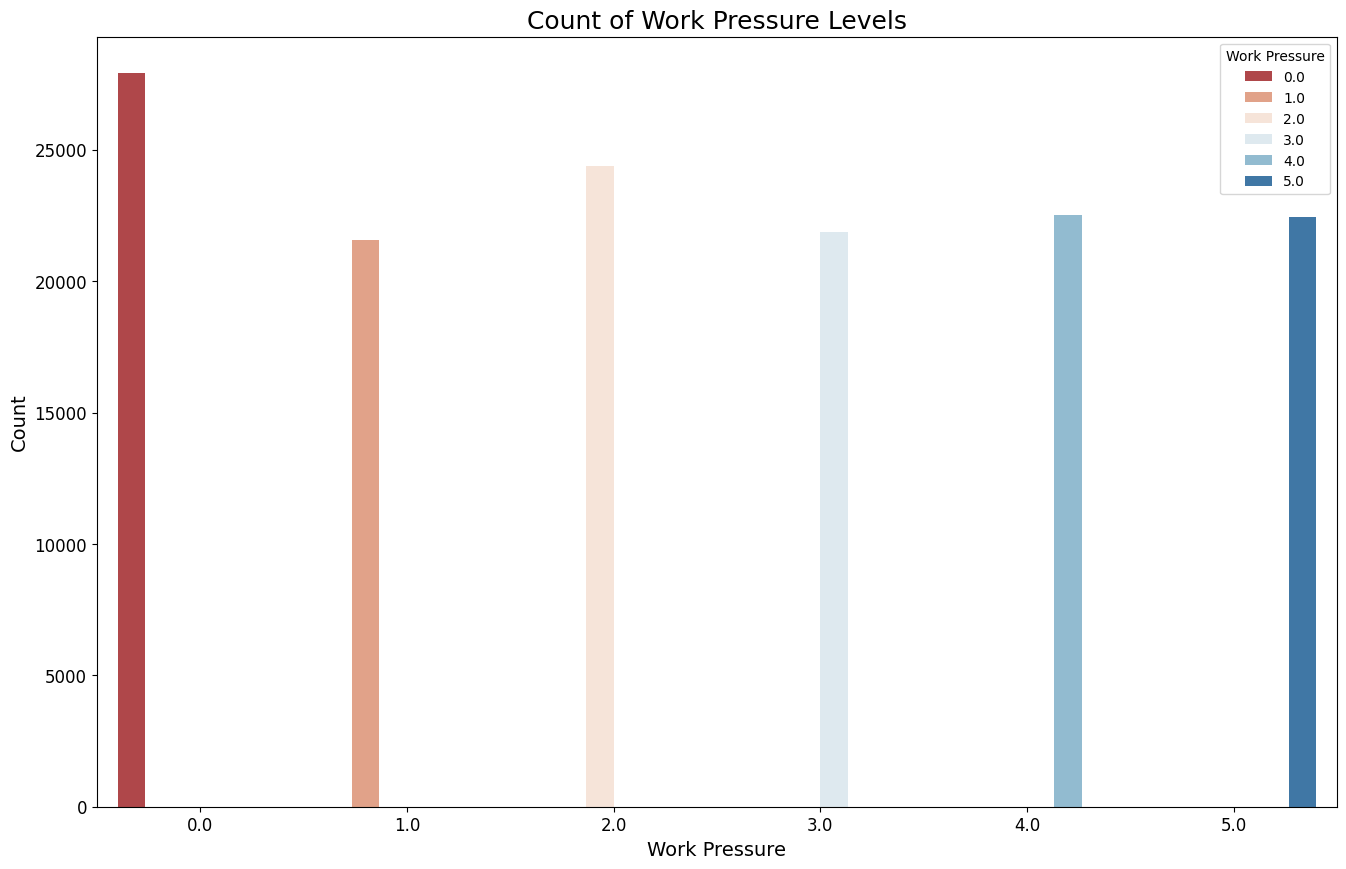

In [54]:
plt.figure(figsize=(16, 10))
sns.countplot(data=train_data, x='Work Pressure', hue= 'Work Pressure', palette='RdBu')
plt.title('Count of Work Pressure Levels', fontsize=18)
plt.xlabel('Work Pressure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Sleep Duration Distribution

In [55]:
train_data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

**Observations:**
<br>
- The **Sleep Duration** column contains significant inconsistencies, including:
  - Invalid entries like `Pune`, `Indore`, `Moderate`, and `Work_Study_Hours`.
  - Overlapping or unclear categories such as `9-6 hours`, `10-6 hours`, and `45`.
  - A mix of valid ranges (`5-6 hours`, `7-8 hours`, etc.) and inconsistent formats (e.g., `than 5 hours`, `1-6 hours`).

1. **Standardization**:
   - Unify similar categories into standard ranges:
     - `<5 hours`
     - `5-6 hours`
     - `6-7 hours`
     - `7-8 hours`
     - `>8 hours`
     <br>
     <br>
   - Merge overlapping or ambiguous categories into the closest valid range.
<br>
<br>
2. **Dropping Invalid Values**:
   - Remove entries that are not relevant to sleep duration.

In [56]:
import pandas as pd

def clean_sleep_duration(df):
    valid_categories = ['Less than 5 hours', '5-6 hours', '6-7 hours', '7-8 hours', 'More than 8 hours']
    
    df['Sleep Duration'] = df['Sleep Duration'].replace({
        'Work_Study_Hours': pd.NA,
        'Moderate': pd.NA,
        'Pune': pd.NA,
        'Indore': pd.NA,
        'than 5 hours': 'Less than 5 hours',
        'Sleep_Duration': pd.NA,
        '45': pd.NA,
        'No': pd.NA,
        '1-6 hours': '5-6 hours',
        '4-6 hours': '5-6 hours',
        '3-6 hours': '5-6 hours',
        '9-6 hours': '7-8 hours',
        '10-6 hours': '7-8 hours',
        '9-5': '7-8 hours',
        '45-48 hours': pd.NA,
        '55-66 hours': pd.NA,
        '9-5 hours': '7-8 hours',
        'Sleep_Duration': pd.NA,
        'Unhealthy': pd.NA
    })

    df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 'Less than 5 hours' if 'hours' in str(x) and 'Less' in str(x) else x)
    df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 'More than 8 hours' if 'hours' in str(x) and 'More' in str(x) else x)

    df = df[df['Sleep Duration'].isin(valid_categories)]
    
    return df

train_data = clean_sleep_duration(train_data)

In [57]:
train_data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38776
7-8 hours            36966
More than 8 hours    32725
5-6 hours            32149
6-7 hours                8
Name: count, dtype: int64

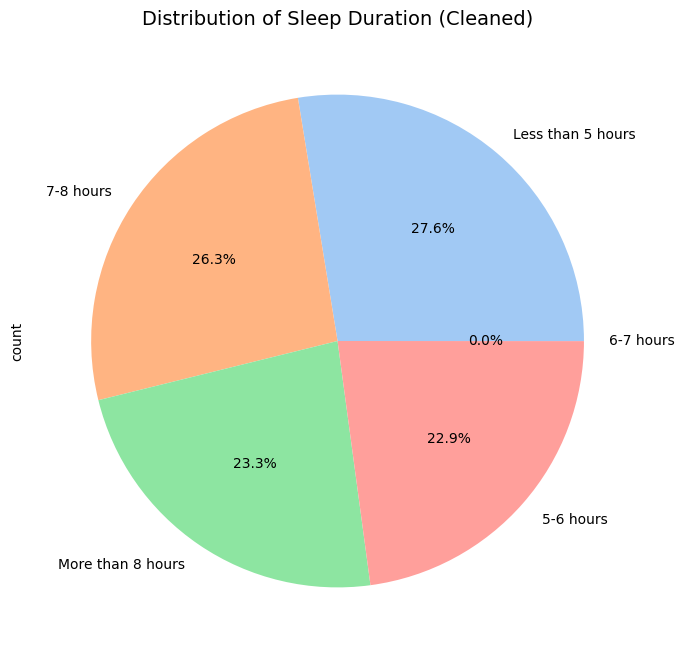

In [58]:
plt.figure(figsize=(8, 8))
train_data['Sleep Duration'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Sleep Duration (Cleaned)', fontsize=14)
plt.show()

- Work/Study Hours

In [59]:
train_data['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14192
11.0    12827
9.0     12706
0.0     12060
12.0    11404
2.0     10589
6.0     10423
7.0      9868
1.0      9796
3.0      9466
5.0      9333
4.0      9059
8.0      8901
Name: count, dtype: int64

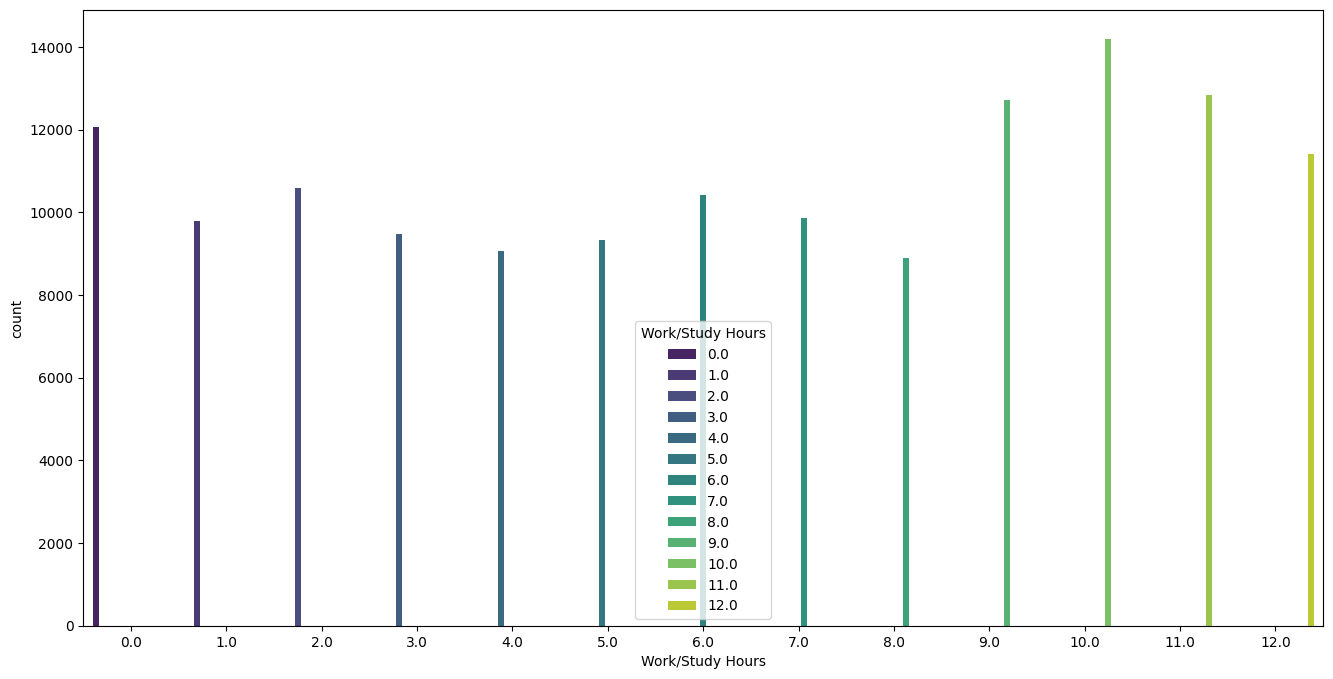

In [60]:
plt.figure(figsize=(16, 8))
sns.countplot(data = train_data, x= 'Work/Study Hours', hue= 'Work/Study Hours', palette='viridis')
plt.show()

In [61]:
def classify_work_study_hours(df):
    bins = [0, 3, 6, 9, 12]
    labels = ['Low', 'Medium', 'High', 'Very High']
    
    classification = pd.cut(df['Work/Study Hours'], bins=bins, labels=labels, right=True, include_lowest=True)
    
    return classification


train_data['Work/Study Hours Classification'] = classify_work_study_hours(train_data)

train_data['Work/Study Hours Classification'].value_counts()

Work/Study Hours Classification
Low          41911
Very High    38423
High         31475
Medium       28815
Name: count, dtype: int64

- Family History of Mental Illness

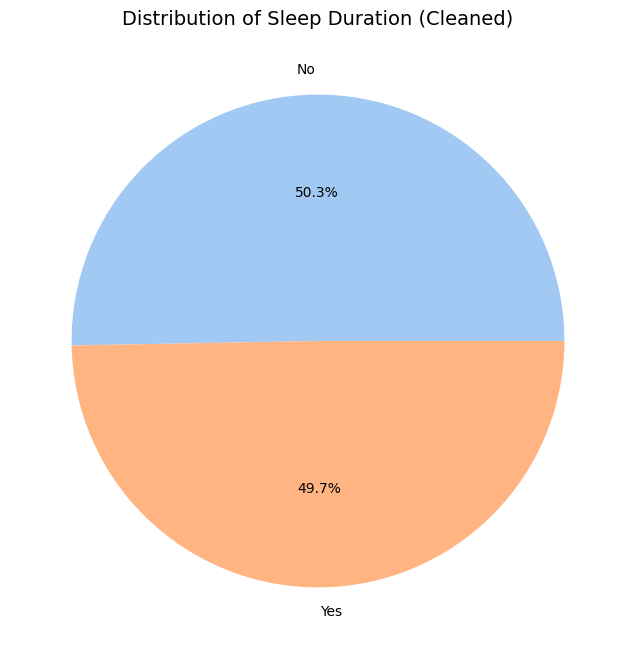

In [62]:
family_history_counts = train_data['Family History of Mental Illness'].value_counts()

plt.figure(figsize=(8, 8))
family_history_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Sleep Duration (Cleaned)', fontsize=14)
plt.ylabel('')
plt.show()

## [6] Modeling

In [63]:
features = ['Gender', 'Working Professional or Student', 'Work Pressure', 'Job Satisfaction',
 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
 'Financial Stress', 'Family History of Mental Illness', 'Profession Category', 'Work/Study Hours Classification']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [65]:
X = train_data[features]
y = train_data['Depression']

In [66]:
categorical_columns = ['Gender', 'Working Professional or Student',
 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness', 'Profession Category', 'Work/Study Hours Classification']

numerical_columns = ['Work Pressure', 'Job Satisfaction', 'Financial Stress']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
def objective_function(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 1, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 15.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0
    }

    model = CatBoostClassifier(**params, cat_features=categorical_columns)


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [69]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

study = optuna.create_study(study_name="CatBoost_Model", direction='maximize')
study.optimize(objective_function, n_trials=50, show_progress_bar=True)

[I 2024-11-28 14:09:20,041] A new study created in memory with name: CatBoost_Model


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-28 14:09:40,567] Trial 0 finished with value: 0.9112888888888889 and parameters: {'iterations': 771, 'depth': 1, 'learning_rate': 0.2620660605676122, 'l2_leaf_reg': 3.6312899437957955, 'border_count': 254, 'random_strength': 1.092120803993002, 'bagging_temperature': 0.6497515139717422}. Best is trial 0 with value: 0.9112888888888889.
[I 2024-11-28 14:09:52,329] Trial 1 finished with value: 0.9128533333333333 and parameters: {'iterations': 291, 'depth': 3, 'learning_rate': 0.15637247067752186, 'l2_leaf_reg': 0.6240518895252996, 'border_count': 225, 'random_strength': 1.1215548425260513, 'bagging_temperature': 0.29543277863464534}. Best is trial 1 with value: 0.9128533333333333.
[I 2024-11-28 14:10:11,090] Trial 2 finished with value: 0.9133511111111111 and parameters: {'iterations': 590, 'depth': 2, 'learning_rate': 0.2149085056182778, 'l2_leaf_reg': 2.0436539051302134, 'border_count': 231, 'random_strength': 9.275229171349844, 'bagging_temperature': 0.32935607638594244}. Bes

In [70]:
print("Best parameters: ", study.best_params)
print("Best AUC: ", study.best_value)

Best parameters:  {'iterations': 851, 'depth': 4, 'learning_rate': 0.15913828904079694, 'l2_leaf_reg': 0.5718358820499203, 'border_count': 189, 'random_strength': 3.28378996233496, 'bagging_temperature': 0.3360727627172444}
Best AUC:  0.9137422222222222


In [71]:
best_parameters = {'iterations': 460, 'depth': 2, 'learning_rate': 0.26975995369060474, 'l2_leaf_reg': 2.510415398983973, 'border_count': 129, 'random_strength': 9.082728374813005, 'bagging_temperature': 0.1733721435829481}

model = CatBoostClassifier(**best_parameters, cat_features= categorical_columns)

model.fit(X_train, y_train)

0:	learn: 0.4638605	total: 38.5ms	remaining: 17.7s
1:	learn: 0.3735509	total: 75.6ms	remaining: 17.3s
2:	learn: 0.3345823	total: 109ms	remaining: 16.6s
3:	learn: 0.3192531	total: 143ms	remaining: 16.3s
4:	learn: 0.3059512	total: 178ms	remaining: 16.2s
5:	learn: 0.2994556	total: 211ms	remaining: 16s
6:	learn: 0.2865679	total: 244ms	remaining: 15.8s
7:	learn: 0.2777663	total: 278ms	remaining: 15.7s
8:	learn: 0.2713616	total: 312ms	remaining: 15.6s
9:	learn: 0.2668637	total: 347ms	remaining: 15.6s
10:	learn: 0.2627342	total: 381ms	remaining: 15.6s
11:	learn: 0.2581723	total: 411ms	remaining: 15.4s
12:	learn: 0.2545257	total: 442ms	remaining: 15.2s
13:	learn: 0.2523576	total: 475ms	remaining: 15.1s
14:	learn: 0.2487603	total: 509ms	remaining: 15.1s
15:	learn: 0.2459326	total: 541ms	remaining: 15s
16:	learn: 0.2434542	total: 575ms	remaining: 15s
17:	learn: 0.2412160	total: 612ms	remaining: 15s
18:	learn: 0.2393027	total: 642ms	remaining: 14.9s
19:	learn: 0.2384481	total: 674ms	remaining: 14

### [7] Testing

In [72]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [73]:
def process_df(df):
    df = df.drop(['id', 'Name', 'City', 'CGPA', 'Academic Pressure', 'Study Satisfaction'], axis = 1)
    
    df['Profession'] = df.apply(
    lambda row: degree_to_profession.get(row['Degree'], row['Profession']),
    axis=1
    )
    df.fillna({'Profession': 'Unknown'}, inplace = True)

    df = clean_dietary_habits(df, drop= False)
    
    df.fillna({'Work Pressure' : 0}, inplace=True)
    df.fillna({'Job Satisfaction': 0}, inplace=True)
    

    df['Profession Category'] = df['Profession'].apply(categorize_profession)

    df['Work/Study Hours Classification'] = classify_work_study_hours(df)

    df = df[features]
    return df

In [74]:
processed_test = process_df(test_df) 

In [75]:
y_pred = model.predict(processed_test)

In [76]:
output = pd.DataFrame({'id': test_df.id, 'Depression': y_pred})
output.to_csv('submissions.csv', index=False)